In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("old_dataset.csv")
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [2]:
df = df.dropna()

xs = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
ys = df['stroke']

In [3]:
s = (xs.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [4]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(xs[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = xs.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = xs.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

OH_X_train, OH_X_valid, y_train, y_valid = train_test_split(OH_X, ys)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

normal_rf_model = RandomForestClassifier()
normal_rf_model.fit(OH_X_train, y_train)
preds = normal_rf_model.predict(OH_X_valid)
print("Normal model MSE :", mean_squared_error(y_valid, preds))
print("Normal model R² :", normal_rf_model.score(OH_X_valid, y_valid))

Normal model MSE : 0.05130293159609121
Normal model R² : 0.9486970684039088


In [7]:
weighed_rf_model = RandomForestClassifier(class_weight="balanced")
weighed_rf_model.fit(OH_X_train, y_train)
preds = weighed_rf_model.predict(OH_X_valid)
print("Weighed model MSE :", mean_squared_error(y_valid, preds))
print("Weighed model R² :", weighed_rf_model.score(OH_X_valid, y_valid))

Weighed model MSE : 0.050488599348534204
Weighed model R² : 0.9495114006514658


In [8]:
import pandas as pd
a = pd.Series(data=preds)
b = pd.Series(data=y_valid)
a.index = b.index
comp = pd.DataFrame({'pred' : a, 'truth' : b})
comp.value_counts()

pred  truth
0     0        1166
      1          62
dtype: int64

# =========================

In [9]:
import imblearn

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(xs, ys)

In [1]:
X_train

NameError: name 'X_train' is not defined

In [11]:
smote_nc = imblearn.over_sampling.SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9])
ov_X_train, ov_y_train = smote_nc.fit_resample(X_train, y_train)

In [12]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(ov_X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = ov_X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = ov_X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [13]:
OH_X_valid.shape

(1228, 21)

In [14]:
smote_rf_model = RandomForestClassifier()
smote_rf_model.fit(OH_X_train, ov_y_train)
preds = smote_rf_model.predict(OH_X_valid)
print("Normal model MSE :", mean_squared_error(y_valid, preds))
print("Normal model R² :", smote_rf_model.score(OH_X_valid, y_valid))

Normal model MSE : 0.08387622149837133
Normal model R² : 0.9161237785016286


In [15]:
import pandas as pd
a = pd.Series(data=preds)
b = pd.Series(data=y_valid)

a.value_counts(), b.value_counts()

(0    1164
 1      64
 dtype: int64,
 0    1173
 1      55
 Name: stroke, dtype: int64)

In [16]:
pd.set_option('display.max_rows', None)
comp = pd.DataFrame({'pred': a, 'truth' : b})
comp.value_counts()

pred  truth
0.0   0.0      219
      1.0       52
1.0   0.0       16
      1.0        3
dtype: int64

In [17]:
# import seaborn
# seaborn.pairplot(ov_X_train.join(ov_y_train), hue="stroke", vars=["age", "avg_glucose_level", "bmi"], kind="kde", plot_kws={"fill" : True})

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_r = pca.fit(OH_X_train).transform(OH_X_train)

In [19]:
X_r

array([[-19.0117428 ,   4.39683331],
       [-32.69531258,   4.3818124 ],
       [-21.47249907,  11.99286907],
       ...,
       [-56.50313056,   1.35712972],
       [-40.19907092, -28.95600367],
       [-16.9281291 , -28.98812122]])

In [20]:
ov_y_train

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      1
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [21]:
import matplotlib.pyplot as plt

In [22]:
def plot_decision_boundary(xs, model, colors, hop):
    from matplotlib.colors import ListedColormap
    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, hop), np.arange(y_min, y_max, hop)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx, yy, zz, alpha=0.4, cmap=ListedColormap(colors), antialiased=True
    )

In [23]:
def plot_training_points(xs, ys, colors, features):
    colors = ["turquoise", "darkorange"]
    lw = 2

    for color, i, target_name in zip(colors, [0, 1], ["No stroke", "Stroke"]):
        plt.scatter(
            X_r[ov_y_train == i, 0], X_r[ov_y_train == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("PCA of oversampled stroke train dataset")

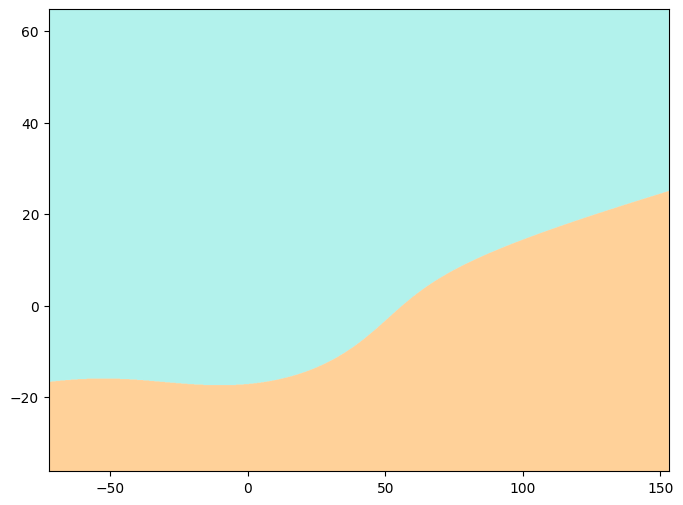

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


COLORS = ["turquoise", "darkorange"]
HOP = 0.1  # Step size in the mesh
model = SVC(kernel="poly")
model.fit(X_r, ov_y_train)
plot_decision_boundary(X_r, model, COLORS, HOP)
# plot_training_points(X_r, ov_y_train, COLORS, ["PC1", "PC2"])

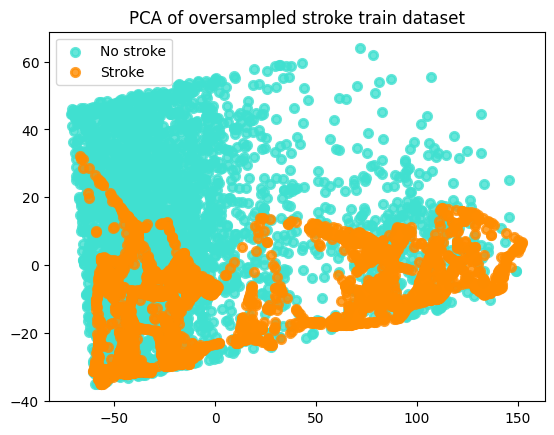

In [30]:
plot_training_points(X_r, ov_y_train, COLORS, ["PC1", "PC2"])

In [31]:
pcatest = PCA(n_components=2)
X_r_test = pcatest.fit(OH_X_valid).transform(OH_X_valid)

In [35]:
p = model.predict(X_r_test)
mean_squared_error(p, y_valid)

0.2939739413680782

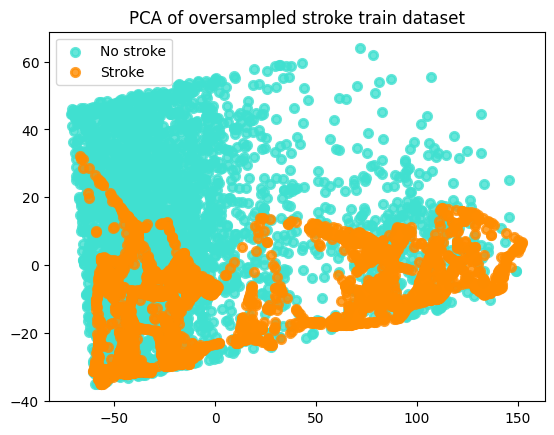

In [37]:
plot_training_points(X_r_test, y_valid, COLORS, ["PC1", "PC2"])

In [36]:
a = pd.Series(data=preds)
b = pd.Series(data=y_valid)
comp = pd.DataFrame({'pred': a, 'truth' : b})
comp.value_counts()

pred  truth
0.0   0.0      219
      1.0       52
1.0   0.0       16
      1.0        3
dtype: int64